In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df=pd.read_csv(r'C:\Users\manav\Desktop\AQI Prediction\dataset\Final_aqi_weather.csv')
from sklearn.model_selection import train_test_split
X=df[['AQI','PM2.5','PM10','NO2','SO2','CO','O3','temperature_2m','relative_humidity_2m','wind_speed_10m']]
y=df[['Next_Day_AQI']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

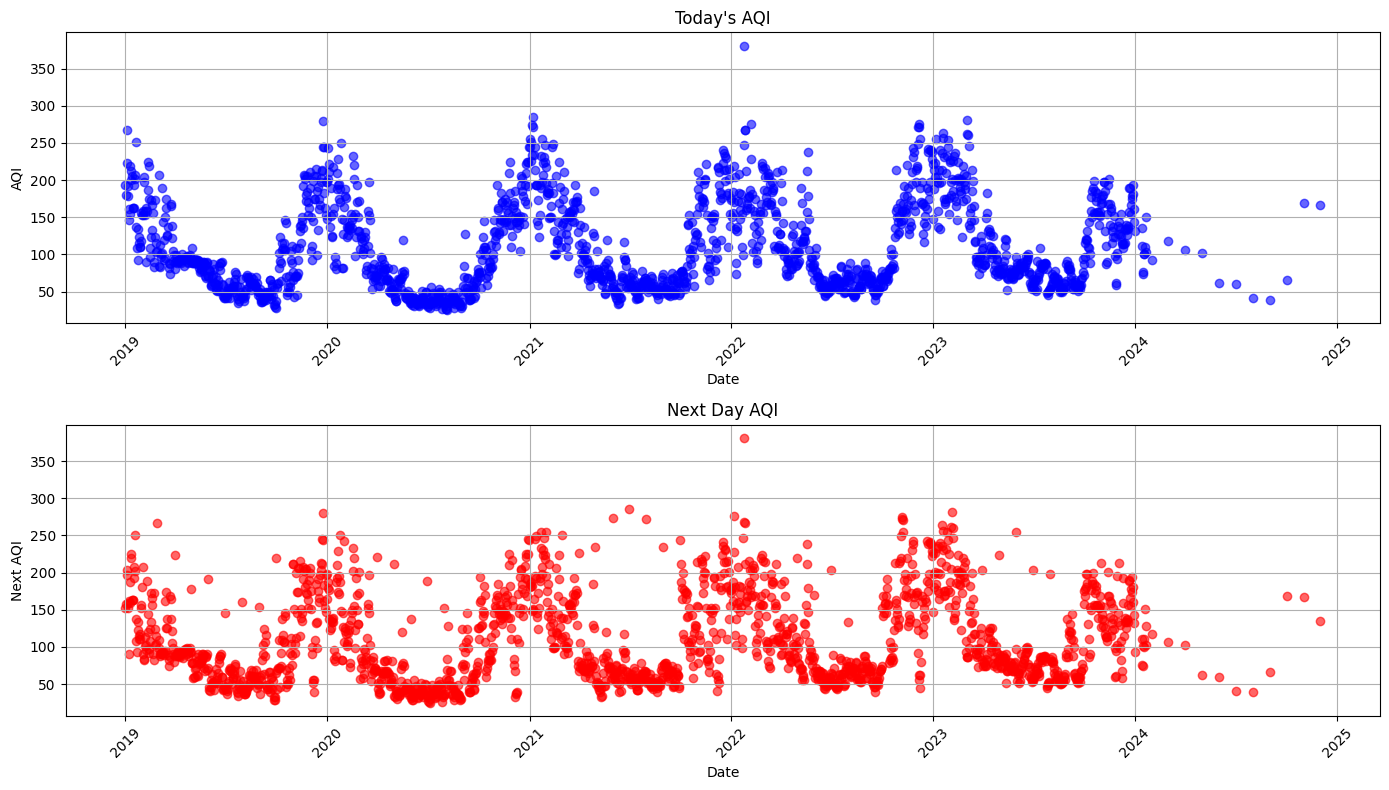

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set up 2 plots vertically
plt.figure(figsize=(14, 8))

# Plot 1: Today's AQI
plt.subplot(2, 1, 1)
plt.scatter(df['date'], df['AQI'], color='blue', alpha=0.6)
plt.title("Today's AQI")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.grid(True)

# Plot 2: Next Day's AQI
plt.subplot(2, 1, 2)
plt.scatter(df['date'], df['Next_Day_AQI'], color='red', alpha=0.6)
plt.title("Next Day AQI")
plt.xlabel("Date")
plt.ylabel("Next AQI")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Pipeline: Polynomial + Ridge
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linreg', LinearRegression())
     
])

# Hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3,4]
}

# Grid Search
search = GridSearchCV(pipeline,param_grid, scoring='neg_mean_squared_error', cv=5)
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_
pred = best_model.predict(X_test)

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# # Polynomial transformation (degree can be tuned)
# poly = PolynomialFeatures(degree=3)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# # Model training
# poly_model = LinearRegression()
# poly_model.fit(X_train_poly, y_train)

# # Prediction
# pred = poly_model.predict(X_test_poly)

# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor

# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 6, 10],
#     'subsample': [0.6, 0.8, 1.0]
# }

# search = RandomizedSearchCV(XGBRegressor(random_state=42),
#                             param_distributions=param_grid, n_iter=10,
#                             cv=5, scoring='neg_mean_squared_error',
#                             random_state=42, n_jobs=-1)
# search.fit(X_train, y_train)
# best_xgb = search.best_estimator_
# pred = best_xgb.predict(X_test)


# # Evaluate
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# print("MAE : ", mean_absolute_error(y_test, pred))
# print("MSE : ", mean_squared_error(y_test, pred))
# print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
# print("R²  : ", r2_score(y_test, pred))

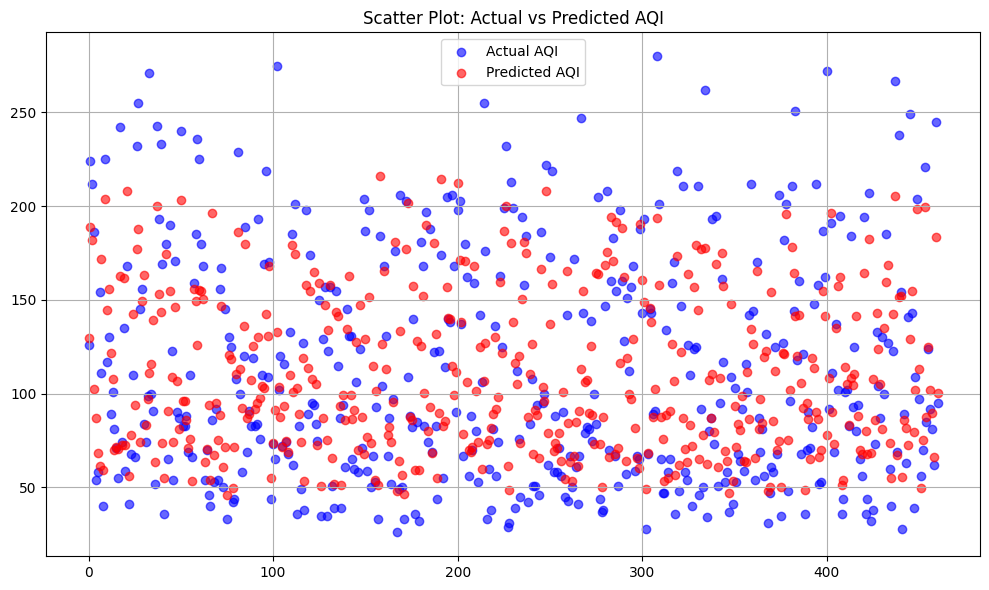

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual AQI')
plt.scatter(range(len(pred)), pred, color='red', alpha=0.6, label='Predicted AQI')
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²    : {r2:.2f}")


MAE  : 27.99
MSE  : 1591.85
RMSE : 39.90
R²    : 0.57


In [63]:
# print("Enter the following values:")

# aqi = float(input("AQI: "))
# pm25 = float(input("PM2.5: "))
# pm10 = float(input("PM10: "))
# no2 = float(input("NO2: "))
# so2 = float(input("SO2: "))
# co = float(input("CO: "))
# o3 = float(input("O3: "))
# temp = float(input("Temperature (°C): "))
# humidity = float(input("Relative Humidity (%): "))
# wind = float(input("Wind Speed (m/s): "))
# precip = float(input("Precipitation (mm): "))

# input_data = np.array([[aqi, pm25, pm10, no2, so2, co, o3, temp, humidity, wind, precip]])
# predicted_aqi = model.predict(input_data)

# print(f"\n📈 Predicted Next Day AQI: {predicted_aqi[0]:.2f}")

In [64]:
import joblib

joblib.dump(pred, 'aqi_model.joblib')
print("✅ Model saved as aqi_model.joblib")

✅ Model saved as aqi_model.joblib
